![Sleep Health and Lifestyle Banner](banner_image.png)

# Sleep Health and Lifestyle

This synthetic dataset contains sleep and cardiovascular metrics as well as lifestyle factors of close to 400 fictive persons.

The workspace is set up with one CSV file, `data.csv`, with the following columns:

- `Person ID`
- `Gender`
- `Age`
- `Occupation`
- `Sleep Duration`: Average number of hours of sleep per day
- `Quality of Sleep`: A subjective rating on a 1-10 scale
- `Physical Activity Level`: Average number of minutes the person engages in physical activity daily
- `Stress Level`: A subjective rating on a 1-10 scale
- `BMI Category`
- `Blood Pressure`: Indicated as systolic pressure over diastolic pressure
- `Heart Rate`: In beats per minute
- `Daily Steps`
- `Sleep Disorder`: One of `None`, `Insomnia` or `Sleep Apnea`

Check out the guiding questions or the scenario described below to get started with this dataset!
Feel free to make this workspace yours by adding and removing cells, or editing any of the existing cells.

Source: [Kaggle](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/)

### 🌎 **Some guiding questions to help you explore this data:**

1. Which factors could contribute to a sleep disorder?
2. Does an increased physical activity level result in a better quality of sleep?
3. Does the presence of a sleep disorder affect the subjective sleep quality metric?

### 📊 **Visualization ideas**
- Boxplot: show the distribution of sleep duration or quality of sleep for each occupation.
- Show the link between age and sleep duration with a scatterplot. Consider including information on the sleep disorder.

### 🔍 **Scenario: Automatically identify potential sleep disorders**

This scenario helps you develop an end-to-end project for your portfolio.

Background: You work for a health insurance company and are tasked to identify whether or not a potential client is likely to have a sleep disorder. The company wants to use this information to determine the premium they want the client to pay.

**Objective**: Construct a classifier to predict the presence of a sleep disorder based on the other columns in the dataset.

Check out our [Linear Classifiers course](https://app.datacamp.com/learn/courses/linear-classifiers-in-python) (Python) or [Supervised Learning course](https://app.datacamp.com/learn/courses/supervised-learning-in-r-classification) (R) for a quick introduction to building classifiers.


In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:

# Importing data
sleep_data = pd.read_csv('data.csv')

# View first 10 lines of the dataset
sleep_data.head(10)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


In [3]:
# Taking an look at the dataset statistics
sleep_data.describe()


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## EDA

In [4]:
sleep_data.info()
sleep_data.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [5]:
# Dropping unnecessary values
sleep_data.drop(columns='Person ID', inplace=True)


In [6]:
# viewing values in Sleep Disorder column
print(sleep_data['Sleep Disorder'].value_counts())

# proportion of NANs in Sleep Disorder
print(sleep_data['Sleep Disorder'].size)
sleep_data['Sleep Disorder'].isna().sum() / sleep_data['Sleep Disorder'].size


Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64
374


0.5855614973262032

### Handling NANs

The proportion of NANs in the `Sleep Disorder` column. We will assume these patients have no disorder. We will label these as 'None', meaning that the patient has no sleep disorder.

In [7]:
sleep_data['Sleep Disorder'].fillna('None', inplace=True)
sleep_data['Sleep Disorder'].value_counts()


Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

### Blood Pressure
To include blood pressure in the analysis we have to create two numerical columns: one for the *systolic* and the other for the *diastolic*. The classification would be as follows:

| Classification | Systolic | Diastolic
|--|--|--|
| Normal | < 120 | < 80 |
| Pre-hypertension | 120-139 | 80-89 |
| Stage 1 Hypertension | 140-159 | 90-99 |
| Stage 2 Hypertension | >= 160 | >= 100 |

In [8]:
# creating new columns for systolic and diastolic pressures
sleep_data[['Systolic BP', 'Diastolic BP']] = sleep_data['Blood Pressure'].str.split('/', expand=True)
sleep_data['Systolic BP'] = sleep_data['Systolic BP'].astype('int')
sleep_data['Diastolic BP'] = sleep_data['Diastolic BP'].astype('int')

# creating a new column for blood pressure classification
systolic_ranges = [0, 120, 140, 160, np.inf]
bp_classification = ['Normal', 'Pre-hypertension', 'Stage 1 Hypertension', 'Stage 2 Hypertension']
sleep_data['BP Classification'] = pd.cut(sleep_data['Systolic BP'], bins=systolic_ranges, labels=bp_classification)
print(sleep_data.info())
sleep_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   374 non-null    object  
 1   Age                      374 non-null    int64   
 2   Occupation               374 non-null    object  
 3   Sleep Duration           374 non-null    float64 
 4   Quality of Sleep         374 non-null    int64   
 5   Physical Activity Level  374 non-null    int64   
 6   Stress Level             374 non-null    int64   
 7   BMI Category             374 non-null    object  
 8   Blood Pressure           374 non-null    object  
 9   Heart Rate               374 non-null    int64   
 10  Daily Steps              374 non-null    int64   
 11  Sleep Disorder           374 non-null    object  
 12  Systolic BP              374 non-null    int64   
 13  Diastolic BP             374 non-null    int64   
 14  BP Classif

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP,BP Classification
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83,Pre-hypertension
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,Pre-hypertension
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,Pre-hypertension
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Pre-hypertension
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,140,90,Pre-hypertension


## Visualising the data

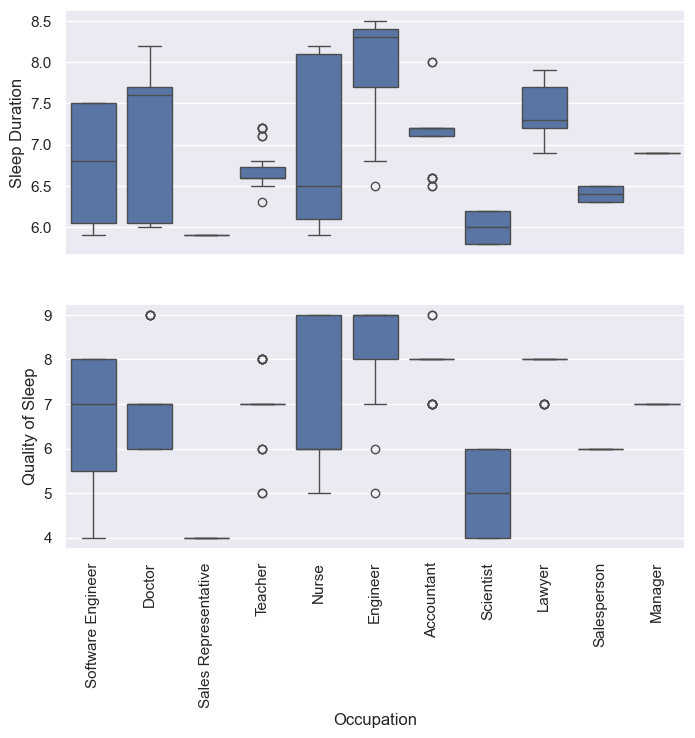

In [9]:
sns.set_theme(style="darkgrid", palette="deep")
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8, 7))

# Exploring categorical data
sns.boxplot(ax=ax[0], data=sleep_data, x='Occupation', y='Sleep Duration')
sns.boxplot(ax=ax[1], data=sleep_data, x='Occupation', y='Quality of Sleep')

plt.xticks(rotation=90)
plt.show()


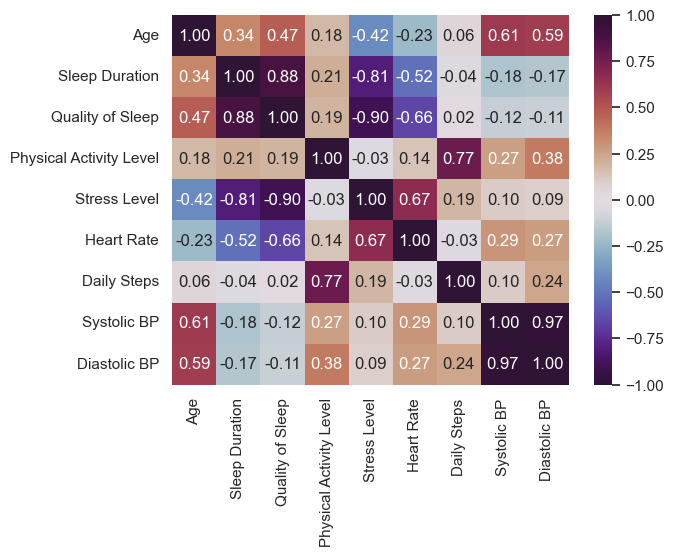

In [10]:
# Finding correlations
sns.heatmap(sleep_data.select_dtypes(include=np.number).corr(), annot=True, vmin=-1, cmap='twilight_shifted', fmt=".2f")
plt.show()


We can appreciate in the heatmap that the features with hightes correlation are:
- Correlated:
  - Systolic BP - Diastolyc BP: 0.97
    - Expected. This is good to crosscheck. If this was not the case, we would have done something wrong during EDA
  - Quality of Sleep - Sleep Duration: 0.88
  - Daily Steps - Physical Activity Level: 0.77
  - Stress Level - Heart Rate: 0.67
  - Quality of Sleep - Age: 0.47
  - Physical Activity - Diastolic BP: 0.38
  - Sleep Duration - Age: 0.34
- Anti-correlated:
  - Stress Level - Quality of Sleep: -0.9
  - Stress Level - Sleep Duration: -0.81
  - Heart Rate - Sleep Duration: -0.52
  - Stress Level - Age: -0.42


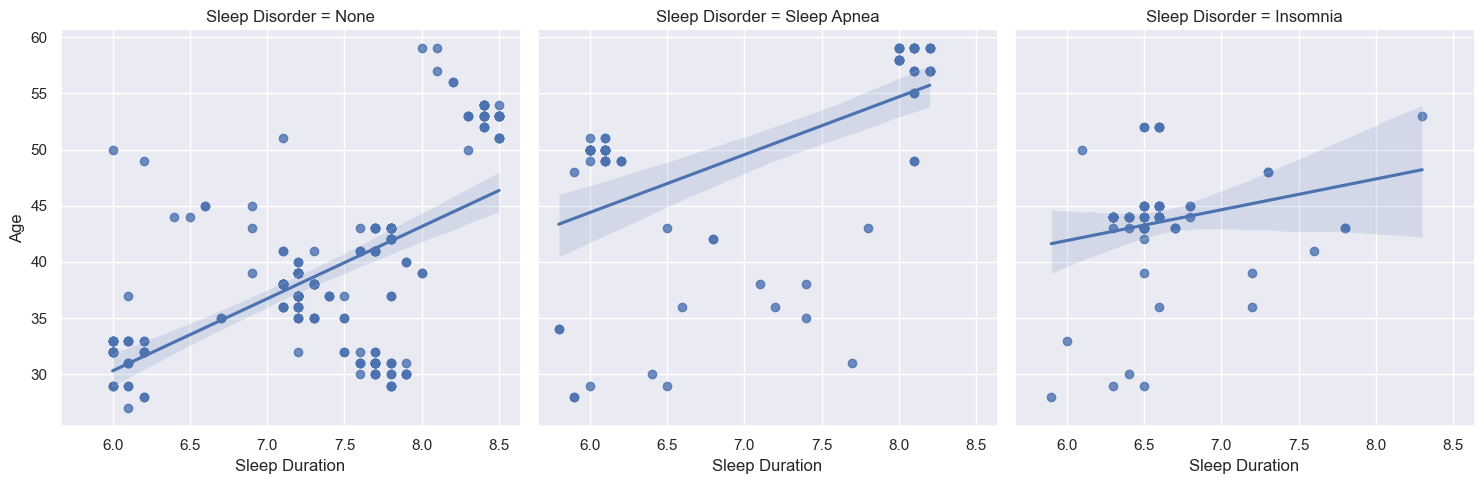

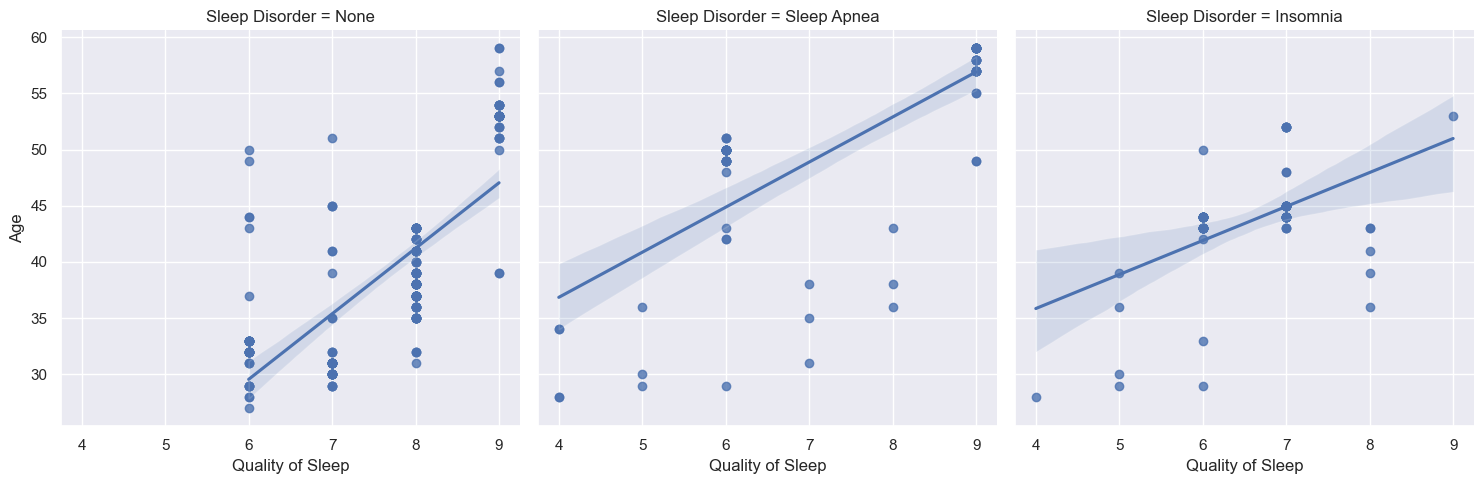

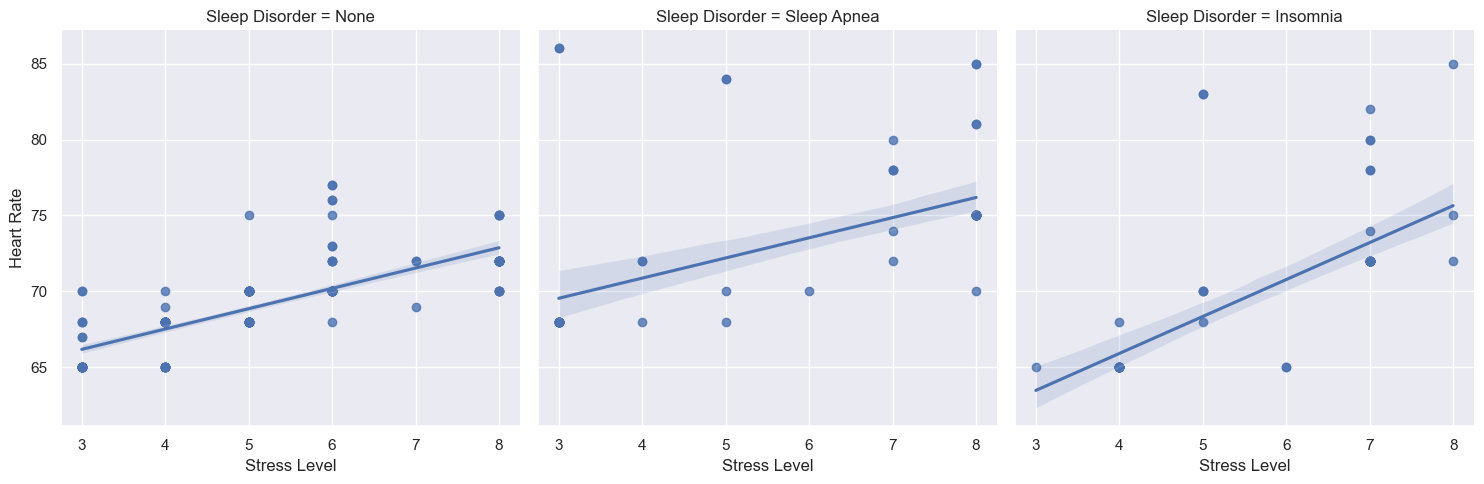

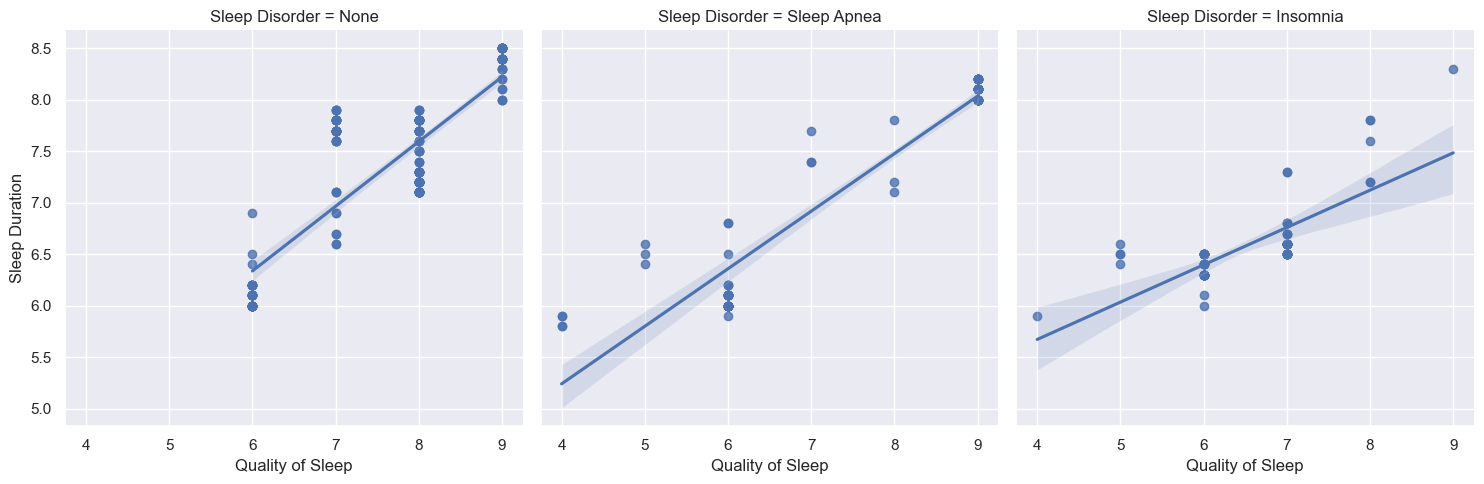

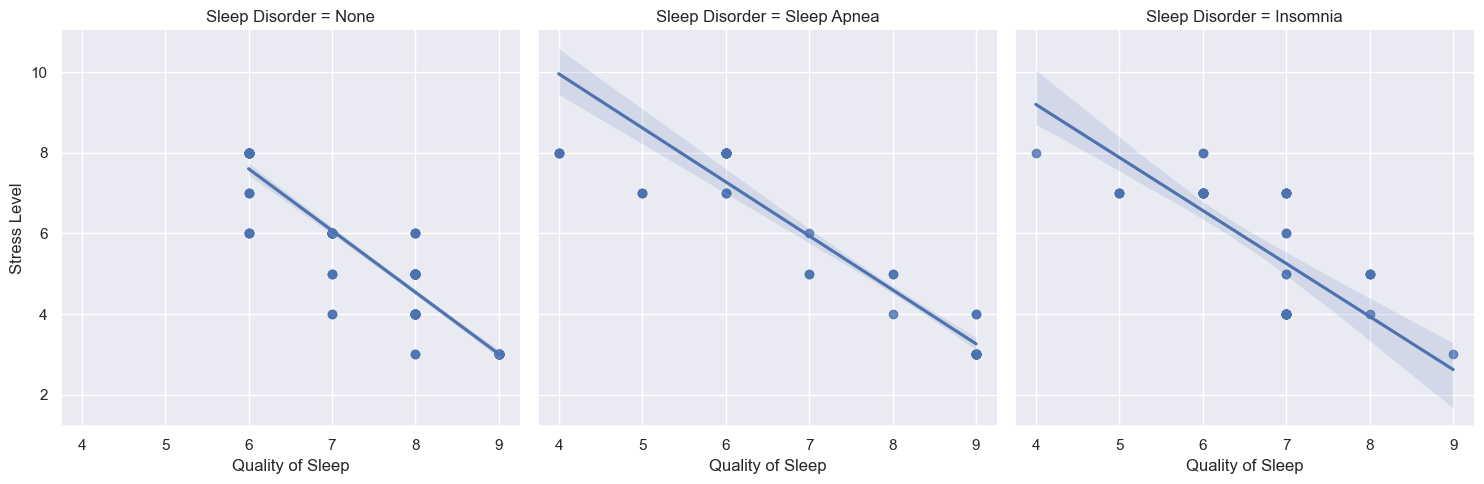

In [11]:
# viewing some relevant correlated data
sns.lmplot(data=sleep_data, x="Sleep Duration", y="Age", col="Sleep Disorder")
sns.lmplot(data=sleep_data, x="Quality of Sleep", y="Age", col="Sleep Disorder")
sns.lmplot(data=sleep_data, x="Stress Level", y="Heart Rate", col="Sleep Disorder")
sns.lmplot(data=sleep_data, x="Quality of Sleep", y="Sleep Duration", col="Sleep Disorder")
sns.lmplot(data=sleep_data, x="Quality of Sleep", y="Stress Level", col="Sleep Disorder")
plt.show()


We will use *logistic correlation* to model our data. To avoid multicollinearity, we will remove those features with highest correlation
- **Systolic and Diastolyc BP**. These columns wer added to create the BP Classification column, so no longer needed.
- **Sleep Duration**: is highly correlated to Sleep Quality
- **Daily Steps**: highly correlated with Physical Activity Level
- **Stress Level**: highly anti-correlated with Quality of Sleep

<Axes: >

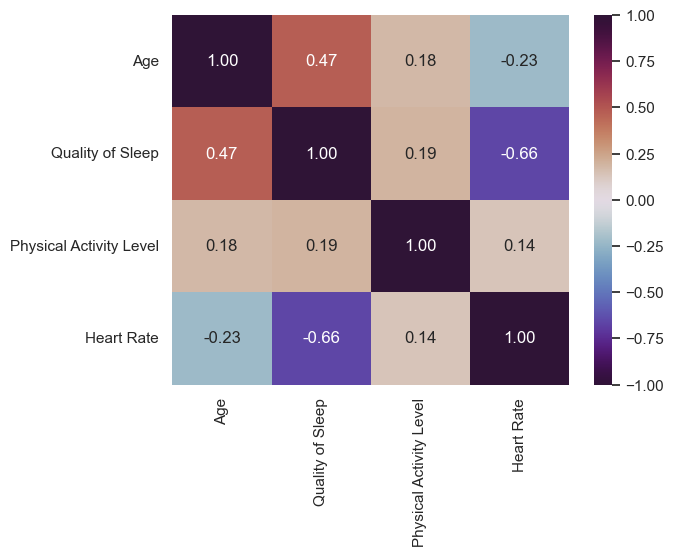

In [12]:
# selecting numeric features
final_num_features = ["Age", "Quality of Sleep", "Physical Activity Level", "Heart Rate"]
sns.heatmap(sleep_data[final_num_features].corr(), annot=True, vmin=-1, cmap='twilight_shifted', fmt=".2f")


In [13]:
sleep_data.select_dtypes(exclude=np.number).head()


,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder,BP Classification
0,Male,Software Engineer,Overweight,126/83,None,Pre-hypertension
1,Male,Doctor,Normal,125/80,None,Pre-hypertension
2,Male,Doctor,Normal,125/80,None,Pre-hypertension
3,Male,Sales Representative,Obese,140/90,Sleep Apnea,Pre-hypertension
4,Male,Sales Representative,Obese,140/90,Sleep Apnea,Pre-hypertension


In [14]:
final_catego_features = ["Gender", "Occupation", "BMI Category", "BP Classification"]
final_features = final_num_features + final_catego_features

from sklearn.preprocessing import OrdinalEncoder

oe_dict = {}

# loop over columns to encode
for col_name in final_catego_features:
    # creating ordinal encoder instance for the column
    oe_dict[col_name] = OrdinalEncoder()
    col = sleep_data[col_name]

    # reshaping column
    reshaped_vals = col.values.reshape(-1, 1)
    encoded_vals = oe_dict[col_name].fit_transform(reshaped_vals)
    sleep_data[col_name] = np.squeeze(encoded_vals)


## Modeling

In [15]:
# splitting dataset into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(sleep_data[final_features], sleep_data["Sleep Disorder"], test_size=0.2, random_state=125)

# Instantiating logistic regression model and training the model
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


### Validating the model

In [16]:
# Printing scores
print("Accuracy score:  {}".format(accuracy_score(y_test, y_pred)))
print("Precision score: {}".format(precision_score(y_test, y_pred, average='weighted')))
print("Recall score:    {}".format(recall_score(y_test, y_pred, average='weighted')))
print("F1 score:        {}\n".format(f1_score(y_test, y_pred, average='weighted')))


# mean probability
proba = lr.predict_proba(X_test)
print(proba.mean())
# maximum probabilities
proba_max = np.max(proba, axis=0)
print(proba_max)
# mean probabilities
proba_means = np.mean(proba, axis=0)
print(proba_means)


Accuracy score:  0.8533333333333334
Precision score: 0.8550365769496204
Recall score:    0.8533333333333334
F1 score:        0.8532210690544023

0.3333333333333333
[0.87550392 0.99803722 0.98861452]
[0.18080904 0.61218621 0.20700475]


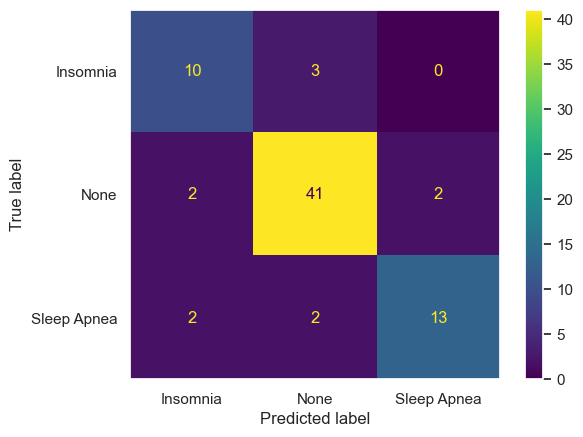

In [21]:
# Confusion matrix
_, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
ax.grid(False)
fig.get_axes()
plt.show()


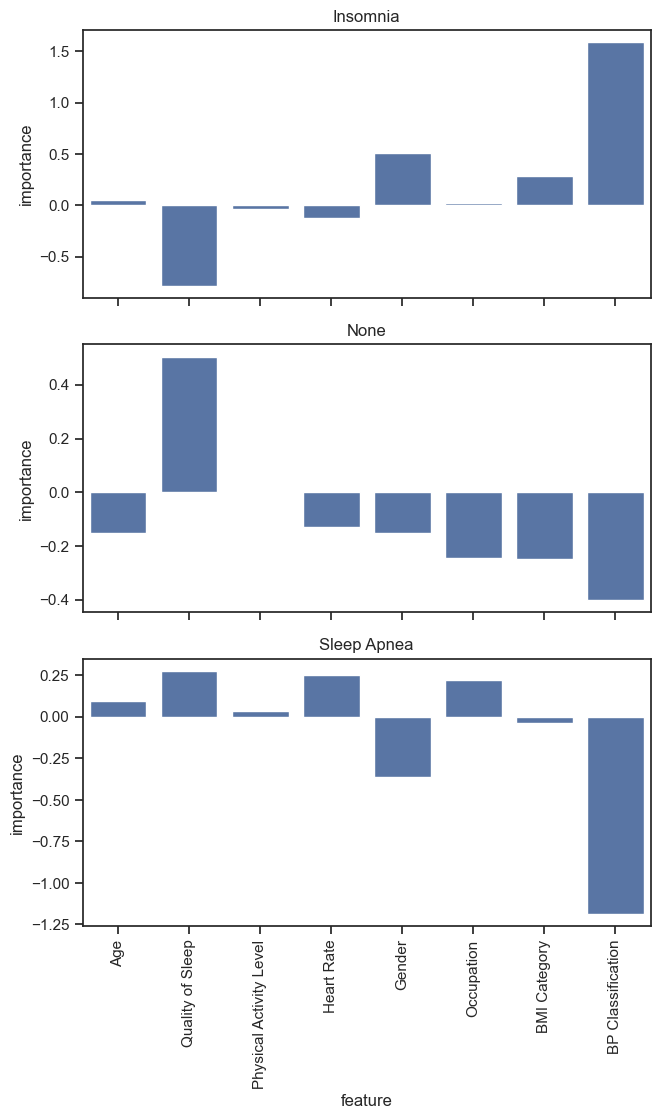

In [42]:
# Finding the importance of features
sns.set_theme(style='ticks')
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(7, 10))
for i in range(3):
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': lr.coef_[i].reshape(-1)
        })
    sns.barplot(data=feature_importance, x='feature', y='importance', ax=ax[i])
    ax[i].set_title(lr.classes_[i])
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()


## To Do List
- Resample both up and down to compare model performance
- 

#### 1. Which factors could contribute to a sleep disorder?

According to the coefficients, 

#### 2. Does an increased physical activity level result in a better quality of sleep?

#### 3. Does the presence of a sleep disorder affect the subjective sleep quality metric?
